In [490]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, neighbors, svm
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import csv
from sklearn.model_selection import cross_val_score

In [491]:
with open('/home/cot12/Documents/ddsm/ddsm-graphs-and-csvs/ddsm-gradient-feature-keypoints.csv') as csvfile:   # open csv file
    readcsv = csv.reader(csvfile, delimiter = ',')# read file 
    density_features = []
    for row in readcsv:
        densitys_f = row[14]
        density_features.append(densitys_f)
        
    density_features [0] = '0' # ignore first elememt of list
    density_features.pop(0)
features = np.array(density_features,dtype=np.float)

In [492]:
with open('/home/cot12/Documents/ddsm/ddsm-graphs-and-csvs/ddsm-gradient-feature-keypoints.csv') as csvfile:   # open csv file
    readcsv = csv.reader(csvfile, delimiter = ',')# read file 
    density = []
    for row in readcsv:
        dense = row[1]
        density.append(dense)
        
    density[0] = '0' # ignore first elememt of list
    density.pop(0)
densities = np.array(density, dtype = np.int)

In [493]:
combined_array = np.zeros((densities.shape[0],2))
combined_array[:,0] = features
combined_array[:,1] = densities
#np.random.shuffle(combined_array)
full_array = combined_array    

In [494]:
def sets(m):
    count = 0
    X_test = np.zeros((80,1)) #not desntiy
    Y_test = np.zeros((80,1))
    X_train = np.zeros((720,1))
    Y_train = np.zeros((720,1))
    for i in range(0,10):
        if i == m:
            X_test = full_array[(i*80):((i+1)*80),0].reshape((-1,1))
            Y_test = full_array[(i*80):((i+1)*80),1].reshape((-1,1))
        else:
            X_train[count*80:((count+1)*80),0] = full_array[(i*80):((i+1)*80),0]
            Y_train[count*80:((count+1)*80),0] = full_array[(i*80):((i+1)*80),1]
            count +=1
    return X_test, Y_test, X_train, Y_train
        

In [495]:
def KNN_classifier():
    results = np.zeros((20,10))
    for z in range(1,21):
        for m in range(0,10):
            X_test, Y_test, X_train, Y_train = sets(m)
            clf = neighbors.KNeighborsClassifier(n_neighbors = z)
            clf.fit(X_train, Y_train)
            accuracy = clf.score(X_test, Y_test)
            results[z-1,m] = accuracy
    return results

In [496]:
def KNN_classifier_each():
    results = np.zeros((9,10))
    predicted_Y = np.zeros((10,80))
    Actual_Y = np.zeros((10,80))
    for m in range(0,10):
        X_test, Y_test, X_train, Y_train = sets(m)
        clf = neighbors.KNeighborsClassifier(n_neighbors = 37)
        clf.fit(X_train, Y_train)
        accuracy = clf.predict(X_test)
        predicted_Y[m,:] = accuracy
        #results[z-1,m] = accuracy
        Actual_Y[m,:] = Y_test.reshape((1,-1))
    return predicted_Y, Actual_Y

In [497]:
count_1_1 = 0
count_2_2 = 0
count_3_3 = 0
count_4_4 = 0
count_1_2 = 0
count_1_3 = 0
count_1_4 = 0
count_2_1 = 0
count_2_3 = 0
count_2_4 = 0
count_3_1 = 0
count_3_2 = 0
count_3_4 = 0
count_4_1 = 0
count_4_2 = 0
count_4_3 = 0
predicted_Y, Actual_Y = KNN_classifier_each()
for ii in range(0,10):
    for w in range(0,80):
        if predicted_Y[ii,w] == Actual_Y[ii,w]:
            if predicted_Y[ii,w] == 1:
                count_1_1 += 1
            if predicted_Y[ii,w] == 2:
                count_2_2 += 1
            if predicted_Y[ii,w] == 3:
                count_3_3 += 1
            if predicted_Y[ii,w] == 4:
                count_4_4 += 1
        else:
            if Actual_Y[ii,w] == 1:
                if predicted_Y[ii,w] == 2:
                    count_1_2 += 1
                if predicted_Y[ii,w] == 3:
                    count_1_3 += 1
                if predicted_Y[ii,w] == 4:
                    count_1_4 += 1
            else:
                if Actual_Y[ii,w] == 2:
                    if predicted_Y[ii,w] == 1:
                        count_2_1 += 1
                    if predicted_Y[ii,w] == 3:
                        count_2_3 += 1
                    if predicted_Y[ii,w] == 4:
                        count_2_4 += 1
                else:
                    if Actual_Y[ii,w] == 3:
                        if predicted_Y[ii,w] == 1:
                            count_3_1 += 1
                        if predicted_Y[ii,w] == 2:
                            count_3_2 += 1
                        if predicted_Y[ii,w] == 4:
                            count_3_4 += 1
                    else:
                        if Actual_Y[ii,w] == 4:
                            if predicted_Y[ii,w] == 1:
                                count_4_1 += 1
                            if predicted_Y[ii,w] == 2:
                                count_4_2 += 1
                            if predicted_Y[ii,w] == 3:
                                count_4_3 += 1
                            
                        
                    
                
        
accuracy_array = np.zeros((4,4))
accuracy_array[:,0] = np.array([[count_1_1, count_1_2, count_1_3, count_1_4]])
accuracy_array[:,1] = np.array([[count_2_1, count_2_2, count_2_3, count_2_4]])
accuracy_array[:,2] = np.array([[count_3_1, count_3_2, count_3_3, count_3_4]])
accuracy_array[:,3] = np.array([[count_4_1, count_4_2, count_4_3, count_4_4]])
l1 = np.sum(accuracy_array[:,0])
l2 = np.sum(accuracy_array[:,1])
l3 = np.sum(accuracy_array[:,2])
l4 = np.sum(accuracy_array[:,3])
induviual_arracy = accuracy_array
induviual_arracy[:,0] = (accuracy_array[:,0]/l1)*100
induviual_arracy[:,1] = (accuracy_array[:,1]/l2)*100
induviual_arracy[:,2] = (accuracy_array[:,2]/l3)*100
induviual_arracy[:,3] = (accuracy_array[:,3]/l4)*100
table_array = np.zeros((4,5))
for p in range(0,4):
    table_array[:,p+1] = induviual_arracy[:,p]
table_array[:,0] = np.array([[1, 2, 3, 4]])

/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/home/cot12/

In [498]:
from tabulate import tabulate

In [499]:
headers = ['0','1','2','3','4']
n = tabulate(table_array, headers = headers, tablefmt = 'fancy_grid')
print(n)

╒═════╤══════════╤══════════╤═══════════╤═══════════╕
│   0 │        1 │        2 │         3 │         4 │
╞═════╪══════════╪══════════╪═══════════╪═══════════╡
│   1 │  0       │  1.5528  │  0.819672 │  0.769231 │
├─────┼──────────┼──────────┼───────────┼───────────┤
│   2 │ 72.1154  │ 59.9379  │ 33.6066   │ 30        │
├─────┼──────────┼──────────┼───────────┼───────────┤
│   3 │ 22.1154  │ 33.5404  │ 53.6885   │ 62.3077   │
├─────┼──────────┼──────────┼───────────┼───────────┤
│   4 │  5.76923 │  4.96894 │ 11.8852   │  6.92308  │
╘═════╧══════════╧══════════╧═══════════╧═══════════╛


/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys
/home/cot12/anaconda3/envs/CoryEnv/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

[41.75]


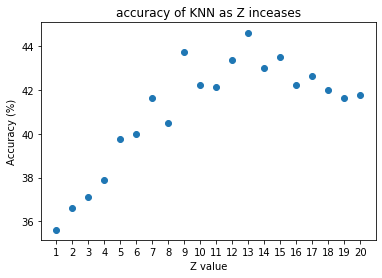

In [500]:
results = KNN_classifier() 
w = np.zeros((1,20))
for z in range(0,20):
    w[:,z] = 100*(np.sum(results[z,:])/10)
b = np.arange(1,21)
print(w[:,19])
plt.title("accuracy of KNN as Z inceases")
plt.scatter(b,w)
plt.xlabel('Z value')
plt.ylabel('Accuracy (%)')
plt.xticks(range(1,21))
plt.savefig('/home/cot12/Documents/ddsm/ddsm-graphs-and-csvs/KNN-features.png')